<font style='font-size:1.5em'>**NLTK Complexity Portion of the Project**</font>

**Author: Sentipedia**  

**Course: DS105L Project** 

---


## Import

### Importing Libraries 

In [2]:
# importing libraries for web scrapping and API acess
import requests
from bs4 import BeautifulSoup

# importing libraries for dataframes 
import pandas as pd
import numpy as np

# importing libraries for plots 
from plotnine import *

# import nltk
import nltk

# importing libraries for ploting networks
import networkx as nx
import matplotlib.pyplot as plt

# import libraries for plotnine
from plotnine import *

# import ggthemes
from plotnine.themes import theme_bw
import matplotlib.font_manager as fm

# Data

### Cleaing the Data

In [12]:
# dataframe with all replies in the UK subreddit
df_reddit_full = pd.read_csv('reddit_full.csv', usecols=['url', 'comment', 'date'])
df_reddit_full['comment'].replace('[deleted]', None, inplace=True)

# dataframe with only replies related to Brexit in the UK subreddit
df_reddit_brexit = pd.read_csv('reddit_brexit.csv', usecols=['url', 'comment', 'date'])
df_reddit_brexit['comment'].replace('[deleted]', None, inplace=True)

# dataframe with news articles on Brexit
df_news = pd.read_csv('news_text.csv', usecols=['title', 'text'])
df_news = df_news.select_dtypes(include='object')
df_news = df_news.dropna()
df_news = df_news[~df_news['text'].str.contains('Sign up')]
df_news = df_news[~df_news['text'].str.contains('trial')]

# Basic Text Complexity Analysis with NLTK

### Using Flesch Reading Ease Score 

In [6]:
# function that calculates the reading ease for each text
def calculate_reading_ease(text):
    try:
        sentences = nltk.sent_tokenize(text)
        words = nltk.word_tokenize(text)
        num_sentences = len(sentences)
        num_words = len(words)
        num_syllables = 0
    
        for word in words:
            num_syllables += syllable_count(word)
    
        # calculate the Flesch Reading Ease score
        reading_ease = 206.835 - 1.015 * (num_words / num_sentences) - 84.6 * (num_syllables / num_words)
        return reading_ease
    except:
        return 0

# supporting function for the reading ease calculation
def syllable_count(word):
    word = word.lower()
    if word.endswith(("es", "ed")) and not word.endswith(("aes", "ees", "oes")):
        word = word[:-2]
    count = 0
    vowels = "aeiouy"
    prev_char_vowel = False
    for char in word:
        if char in vowels and not prev_char_vowel:
            count += 1
        prev_char_vowel = char in vowels
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count = 1
    return count

In [14]:
# getting complexity score for each dataframe
df_reddit_full['score'] = df_reddit_full['comment'].apply(calculate_reading_ease)
df_reddit_brexit['score'] = df_reddit_brexit['comment'].apply(calculate_reading_ease)
df_news['score'] = df_news['text'].apply(calculate_reading_ease)

### Displaying Results

In [16]:
reddit_full_avg = df_reddit_full['score'].mean()
reddit_brexit_avg = df_reddit_brexit['score'].mean()
new_avg = df_news['score'].mean()

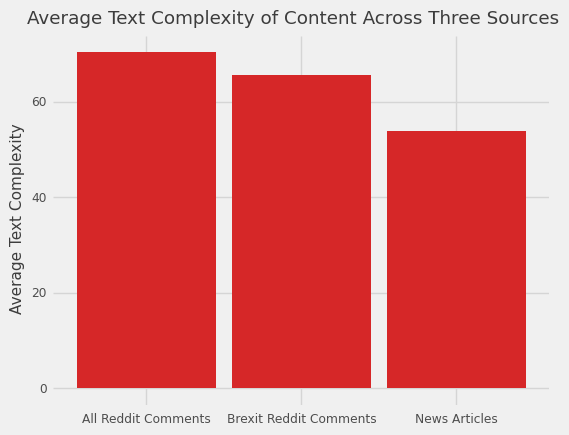

<ggplot: (8787932377519)>

In [25]:
data = {'Name': ['All Reddit Comments', 'Brexit Reddit Comments', 'News Articles'],
        'Averages': [reddit_full_avg, reddit_brexit_avg, new_avg]}
df = pd.DataFrame(data)

plot = (
    ggplot(df, aes(x='Name', y='Averages')) +
    geom_bar(stat='identity', fill = '#d62728') +
    ggtitle('Average Text Complexity of Content Across Three Sources') +
    labs(x='', y='Average Text Complexity') +
    theme(figure_size=(8, 4)) +
    theme_538()
    )

plot